# Chapter 6 - Exercises

### 1. Set up a random experiment to test the difference between a sequential search and a binary search on a list of integers.

Let's first import the necesssary libraries and define both searching algorithms.

In [2]:
import time 
import random 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

def sequential_search(ls, e, is_sorted=False):
    for i, n in enumerate(ls):
        if e == n:
            return i

        if is_sorted and ls[i] > e:
            break 

    return -1

def binary_search(ls, e):
    low = 0
    high = len(ls) - 1

    while low <= high:
        mid = (low + high) // 2 
        if e < ls[mid]:
            high = mid - 1
        elif e > ls[mid]:
            low = mid + 1
        else:
            return mid

    return -1 
    

Let's now set up the experiment, by generating random ordered list (we need them for binary search, otherwise we would not get deterministic results). First let's start with values that really are inside the array.

In [3]:
def simulate_searches(max_size_exp=6, n_simulations=10):
    sizes = [10 ** i for i in range(1, max_size_exp + 1)]
    access_sequential = []
    access_binary = []

    for size in sizes:
        for sim in range(n_simulations):
            sequential = []
            binary = []
            a = random.sample(range(size), size)
            a.sort()
            idx = random.randint(0, size - 1)
            element = a[idx]

            b = time.time()
            _ = sequential_search(a, element, is_sorted=True)
            e = time.time()
            sequential += [e - b]

            b = time.time()
            _ = binary_search(a, element)
            e = time.time()
            binary += [e - b]
        
        access_sequential += [np.array(sequential).mean()]
        access_binary += [np.array(binary).mean()]

    return pd.DataFrame({"sequential": access_sequential, "binary": access_binary})

times = simulate_searches(7, 5)

Now let's plot the access times. On the x-axis we have the power to which we are raising 10 to get the input size of the array (`size = 10 ** (x + 1)`) and on the y axis the time in seconds needed to complete the search. In all cases, elements are found inside the array.

<AxesSubplot:>

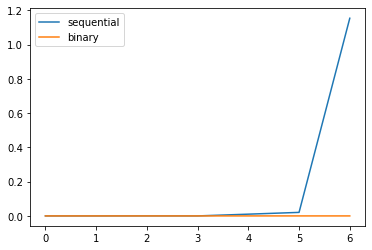

In [9]:
times.plot()

We see how sequential search takes a huge amount of time (it's exponential because sizes are increasing in an exponential fashion, but it would be linear), while binary search has a very mild increase which is not evident for such a huge case. Feel free to experiment with bigger sizes keeping in mind that it will take more time.
It would be great to also experiment with a linearly increasing size as well as different scenarios (for example where elements are not found), I will try to make a more complete experiment over the next questions.

### 2. Use the binary search functions given in the text (recursive and iterative). Generate a random, ordered list of integers and do a benchmark analysis for each one. What are your results? Can you explain them?

Let's first define a recursive binary search function.

In [10]:
def recursive_binary_search(ls, e):
    if len(ls) == 0:
        return -1
    else:
        mid = len(ls) // 2 

        if e < ls[mid]:
            return recursive_binary_search(ls[:mid], e)
        elif e > ls[mid]:
            return recursive_binary_search(ls[mid + 1:], e)
        else:
            return True



Now let's do some simulations.

In [12]:
def simulate_binary_searches(max_size_exp=6, n_simulations=10):
    sizes = [10 ** i for i in range(1, max_size_exp + 1)]
    access_recursive = []
    access_iterative = []

    for size in sizes:
        for sim in range(n_simulations):
            recursive = []
            iterative = []
            a = random.sample(range(size), size)
            a.sort()
            idx = random.randint(0, size - 1)
            element = a[idx]

            b = time.time()
            _ = sequential_search(a, element, is_sorted=True)
            e = time.time()
            recursive += [e - b]

            b = time.time()
            _ = binary_search(a, element)
            e = time.time()
            iterative += [e - b]
        
        access_recursive += [np.array(recursive).mean()]
        access_iterative += [np.array(iterative).mean()]

    return pd.DataFrame({"recursive": access_recursive, "iterative": access_iterative})

times_binary = simulate_binary_searches(7, 5)


Let's now plot the access times.

<AxesSubplot:>

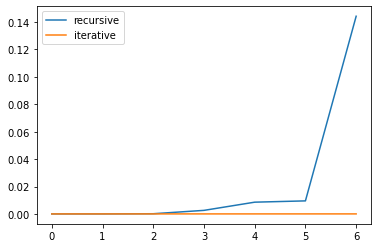

In [13]:
times_binary.plot()

As expected the recursive approach time increases with size in an exponential fashion due to the overhead of sub-calling the routine itself.

### 3. Implement the binary search using recursion without the slice operator. Recall that you will need to pass the list along with the starting and ending index values for the sublist. Generate a random, ordered list of integers and do a benchmark analysis.